In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_excel('C:\pbl_movie.xlsx',header=0)

In [3]:
X=data[['주연 top50 출연 여부','배급사','국적','전국 스크린수','경쟁작',
       '가족','공연','공포(호러)','기타','다큐멘터리','드라마','멜로/로맨스','뮤지컬',
       '미스터리','범죄','사극','스릴러','액션','어드벤처','전쟁',
       '코미디','판타지','SF','top영화감독 여부','네티즌 평점','러닝타임',
       '연작','원작','12세관람가','15세관람가','19세관람가',
       '연휴기간 상영여부']]
X1=data[['주연 top50 출연 여부','배급사', '전국 스크린수','러닝타임', '네티즌 평점',
        'top영화감독 여부','연휴기간 상영여부']]
X2=data[['주연 top50 출연 여부','전국 스크린수','15세관람가','top영화감독 여부','국적',
        '네티즌 평점','연휴기간 상영여부']]
y=data[['전국 관객수']]
y1=data[['전국 관객수 분류']]

In [4]:
scaler=StandardScaler()
feature_to_scale=['전국 스크린수','러닝타임','네티즌 평점','경쟁작']
feature_to_scale1=['전국 스크린수','러닝타임','네티즌 평점']
feature_to_scale2=['전국 스크린수','네티즌 평점']
scale=scaler.fit_transform(data[feature_to_scale])
scale1=scaler.fit_transform(data[feature_to_scale1])
scale2=scaler.fit_transform(data[feature_to_scale2])
X[feature_to_scale]=scale
X1[feature_to_scale1]=scale1
X2[feature_to_scale2]=scale2

<ipython-input-4-2b440a3bce64>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature_to_scale]=scale
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-4-2b440a3bce64>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [5]:
#k-최근접 이웃 알고리즘(회귀)
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=5,test_size=0.2)
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,random_state=5,test_size=0.2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,random_state=5,test_size=0.2)
t=pd.DataFrame(columns=['i','score'])
t1=pd.DataFrame(columns=['i','score'])
t2=pd.DataFrame(columns=['i','score'])
for i in range(1,30):
    knr= KNeighborsRegressor(n_neighbors=i, weights="distance")
    knr1= KNeighborsRegressor(n_neighbors=i, weights="distance")
    knr2= KNeighborsRegressor(n_neighbors=i, weights="distance")

    knr.fit(X_train,y_train)
    knr1.fit(X_train1,y_train1)
    knr2.fit(X_train2,y_train2)
    print(i)
    print("학습 데이터 점수 : {}".format(knr.score(X_train,y_train)))
    print("평가 데이터 점수 : {}".format(knr.score(X_test,y_test)))
    print("학습 데이터 점수1 : {}".format(knr1.score(X_train1,y_train1)))
    print("평가 데이터 점수1 : {}".format(knr1.score(X_test1,y_test1)))
    print("학습 데이터 점수2 : {}".format(knr2.score(X_train2,y_train2)))
    print("평가 데이터 점수2 : {}".format(knr2.score(X_test2,y_test2)))
    t.loc[i-1]=[i,knr.score(X_test,y_test)]
    t1.loc[i-1]=[i,knr1.score(X_test1,y_test1)]
    t2.loc[i-1]=[i,knr2.score(X_test2,y_test2)]

1
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.35376468183309273
학습 데이터 점수1 : 0.9999921114060766
평가 데이터 점수1 : 0.5203805407158955
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.1013299634231235
2
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.5268391799913343
학습 데이터 점수1 : 0.9999960557030383
평가 데이터 점수1 : 0.49571917075296223
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.3752383706296819
3
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.4951750571466279
학습 데이터 점수1 : 0.9999960557030383
평가 데이터 점수1 : 0.5656334724096339
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.5000525404407341
4
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.49844910960658406
학습 데이터 점수1 : 0.9999960557030383
평가 데이터 점수1 : 0.5555667972805214
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.5305211059740549
5
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.5071049448654394
학습 데이터 점수1 : 0.9999960557030383
평가 데이터 점수1 : 0.5887814074513666
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.545486758185536
6
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.5063596282085085
학습 데이터 점수1 : 0.9999960557030383
평가 데이터 점수1 : 0.5757003854917653
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.5707315720695662
7
학습 데이터 점수 : 1.0
평가 데이터 점

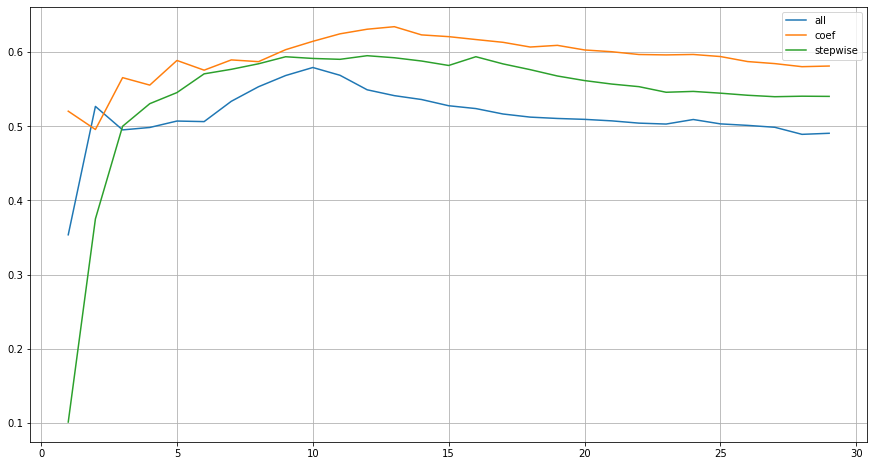

In [7]:
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(t[['i']],t[['score']],label="all")
plt.plot(t1[['i']],t1[['score']],label="coef")
plt.plot(t2[['i']],t2[['score']],label="stepwise")
plt.legend()

In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=5,test_size=0.2)
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,random_state=5, test_size=0.2)
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,random_state=5, test_size=0.2)

knr= KNeighborsRegressor(n_neighbors=10, weights="distance")
knr1= KNeighborsRegressor(n_neighbors=13, weights="distance")
knr2= KNeighborsRegressor(n_neighbors=12, weights="distance")

knr.fit(X_train,y_train)
knr1.fit(X_train1,y_train1)
knr2.fit(X_train2,y_train2)

y_pred=knr.predict(X_test)
y_pred1=knr1.predict(X_test1)
y_pred2=knr2.predict(X_test2)

for i in range(0,199):
    if y_pred[i]<0:
        y_pred[i]=0
    if y_pred1[i]<0:
        y_pred1[i]=0
    if y_pred2[i]<0:
        y_pred2[i]=0

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1=np.sqrt(mean_squared_error(y_test1,y_pred1))
rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))

print("학습 데이터 점수 : {}".format(knr.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(knr.score(X_test,y_test)))
print("rmse : {}".format(rmse))

print("학습 데이터 점수 : {}".format(knr1.score(X_train1,y_train1)))
print("평가 데이터 점수 : {}".format(knr1.score(X_test1,y_test1)))
print("rmse1 : {}".format(rmse1))

print("학습 데이터 점수 : {}".format(knr2.score(X_train2,y_train2)))
print("평가 데이터 점수 : {}".format(knr2.score(X_test2,y_test2)))
print("rmse2 : {}".format(rmse2))

학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.5792875676380783
rmse : 1346076.6250725326
학습 데이터 점수 : 0.9999960557030383
평가 데이터 점수 : 0.6343168934385219
rmse1 : 1254959.0610196576
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.5952043106008672
rmse2 : 1320368.1791512724


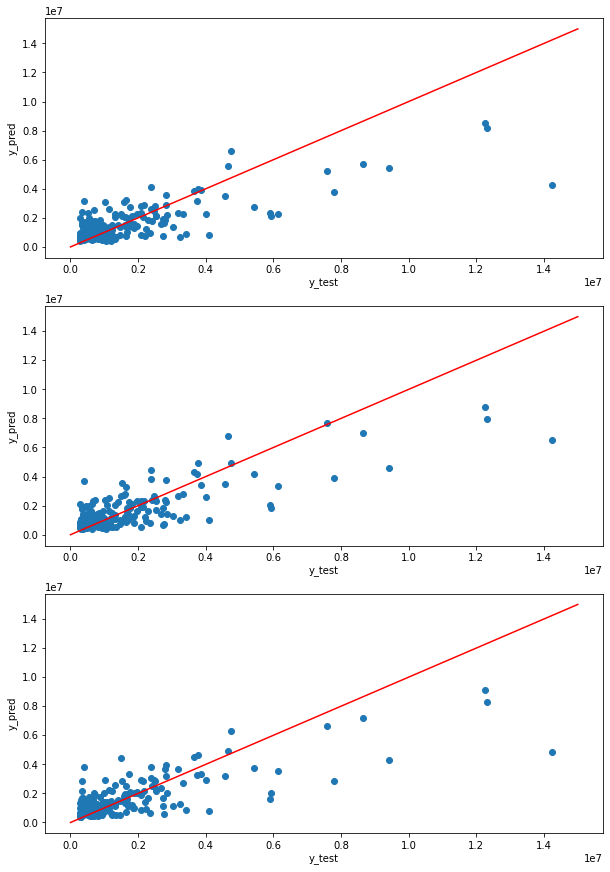

In [9]:
n=np.arange(0,15000000)
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.scatter(y_test,y_pred,marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.subplot(312)
plt.scatter(y_test1,y_pred1,marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.subplot(313)
plt.scatter(y_test2,y_pred2, marker='o')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot(n,n,color='r')
plt.show()

In [10]:
#K-최근접 이웃 알고리즘(분류)
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)
t=pd.DataFrame(columns=['i','score'])
t1=pd.DataFrame(columns=['i','score'])
t2=pd.DataFrame(columns=['i','score'])
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn1=KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn2=KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train,y1_train)
    knn1.fit(X_train1,y1_train1)
    knn2.fit(X_train2,y1_train2)
    print(i)
    print("학습 데이터 점수 : {}".format(knn.score(X_train,y1_train)))
    print("평가 데이터 점수 : {}".format(knn.score(X_test,y1_test)))
    print("학습 데이터 점수1 : {}".format(knn1.score(X_train1,y1_train1)))
    print("평가 데이터 점수1 : {}".format(knn1.score(X_test1,y1_test1)))
    print("학습 데이터 점수2 : {}".format(knn2.score(X_train2,y1_train2)))
    print("평가 데이터 점수2 : {}".format(knn2.score(X_test2,y1_test2)))
    t.loc[i-1]=[i,knn.score(X_test,y1_test)]
    t1.loc[i-1]=[i,knn1.score(X_test1,y1_test1)]
    t2.loc[i-1]=[i,knn2.score(X_test2,y1_test2)]

<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

1
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.575
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.575
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.545
2
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.575
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.575
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.545
3
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.605
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.6
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.575


<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was exp

4
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.615
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.585
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.615
5
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.615
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.585
6
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.64
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.615
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.59
7
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.68
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.635
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.6
8
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.62
9


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.67
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.62
10
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.645
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.705
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.63
11
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.625
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.635


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

12
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.62
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.65
13
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.63
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.67
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.66
14
학습 데이터 점수 : 1.0


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

평가 데이터 점수 : 0.625
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.66
15
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.65
16
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.655


<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was exp

학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.665
17
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.66
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.64
18
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 1.0


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

평가 데이터 점수2 : 0.66
19
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.66
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.665
20
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.66


<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was exp

21
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.66
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.66
22
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.67
23


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675
24
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.66
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675
25
학습 데이터 점수 : 1.0


<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was exp

평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.67
26
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.675
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.67
27
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0

<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was exp


평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.665
28
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.66
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.665
29
학습 데이터 점수 : 1.0


<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was exp

평가 데이터 점수 : 0.66
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.66
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675
30
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.65
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

31
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.66
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.67
32
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.655
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.67


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

33
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.665
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675
34
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.67


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

35
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675
36
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.67
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.67


<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was exp

37
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675
38
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.675
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675


<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)


39
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.68
40
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.65
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.68
41
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.68
42
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655

<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect


학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.68
43
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.67
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.68


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

44
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.655
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.68
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675
45
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.665
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.67


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

46
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675
47
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.685
학습 데이터 점수2 : 1.0


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)
<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expect

평가 데이터 점수2 : 0.67
48
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.695
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675
49
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.66
학습 데이터 점수1 : 1.0
평가 데이터 점수1 : 0.69
학습 데이터 점수2 : 1.0
평가 데이터 점수2 : 0.675


<ipython-input-10-2595995f14ad>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-10-2595995f14ad>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-10-2595995f14ad>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)


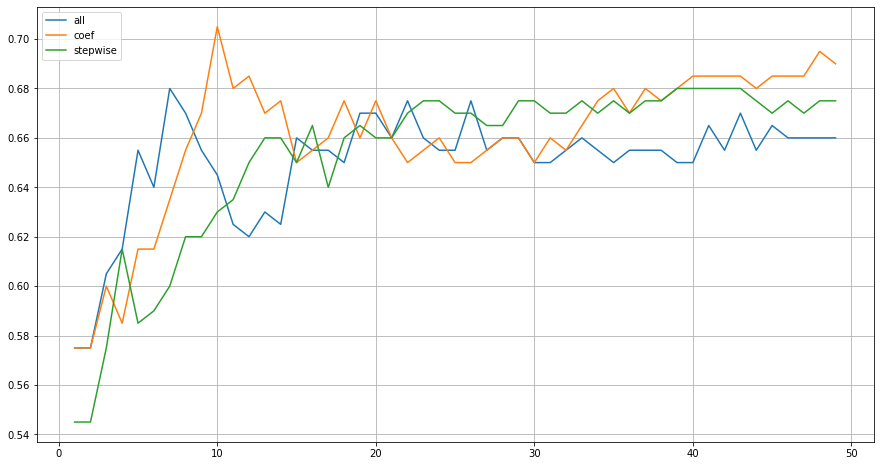

In [11]:
plt.figure(figsize=(15,8))
plt.grid()
plt.plot(t[['i']],t[['score']],label="all")
plt.plot(t1[['i']],t1[['score']],label="coef")
plt.plot(t2[['i']],t2[['score']],label="stepwise")
plt.legend()

In [19]:
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,random_state=5,test_size=0.2)
X_train1,X_test1,y1_train1,y1_test1=train_test_split(X1,y1,random_state=5,test_size=0.2)
X_train2,X_test2,y1_train2,y1_test2=train_test_split(X2,y1,random_state=5,test_size=0.2)

knn=KNeighborsClassifier(n_neighbors=7, weights='distance')
knn1=KNeighborsClassifier(n_neighbors=10, weights='distance')
knn2=KNeighborsClassifier(n_neighbors=39, weights='distance')

knn.fit(X_train,y1_train)
knn1.fit(X_train1,y1_train1)
knn2.fit(X_train2,y1_train2)

y_pred=knn.predict(X_test)
y_pred1=knn1.predict(X_test1)
y_pred2=knn2.predict(X_test2)

print("학습 데이터 점수 : {}".format(knn.score(X_train,y1_train)))
print("평가 데이터 점수 : {}".format(knn.score(X_test,y1_test)))
print("학습 데이터 점수 : {}".format(knn1.score(X_train1,y1_train1)))
print("평가 데이터 점수 : {}".format(knn1.score(X_test1,y1_test1)))
print("학습 데이터 점수 : {}".format(knn2.score(X_train2,y1_train2)))
print("평가 데이터 점수 : {}".format(knn2.score(X_test2,y1_test2)))


학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.68
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.705
학습 데이터 점수 : 1.0
평가 데이터 점수 : 0.68


<ipython-input-19-cced317dd58e>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y1_train)
<ipython-input-19-cced317dd58e>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(X_train1,y1_train1)
<ipython-input-19-cced317dd58e>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(X_train2,y1_train2)


In [20]:
#크로스탭
y1_test=y1_test.values.ravel()
y1_test1=y1_test1.values.ravel()
y1_test2=y1_test2.values.ravel()
ct=pd.crosstab(index=y1_test,columns=y_pred)
ct1=pd.crosstab(index=y1_test1,columns=y_pred1)
ct2=pd.crosstab(index=y1_test2,columns=y_pred2)
print(ct, "\n{}".format(ct1),"\n{}".format(ct2))

col_0   1   2  3  4
row_0              
1      92  11  2  0
2      31  35  4  0
3       4   8  5  0
4       0   2  2  4 
col_0   1   2  3  4
row_0              
1      89  16  0  0
2      29  38  3  0
3       3   5  9  0
4       0   2  1  5 
col_0   1   2  3  4
row_0              
1      89  16  0  0
2      29  37  4  0
3       5   5  7  0
4       0   3  2  3
